# **Análise da base de dados *'LAPD_Calls_for_Service_2022'* 📄📊**
---
## 1. Preparo das ferramentas necessárias para análise

### 1.1 Bibliotecas

Antes de iniciar a análse, é feita a importação de bibliotecas que serão utilizadas posteriormente. A seguir, uma tabela com cada biblioteca, uma breve descrição e sua utilidade na análise:  

|Nome |Descrição|Utilidade|
|:---:|:-------:|:-------:|
|`pandas`|Oferece estruturas de dados (Series e DataFrames) e funções para data wrangling|Abertura, armazenamento e tratamento da base de crimes|
|`numpy`|Biblioteca fundamental para computação numérica em Python|Fornece suporte a arrays multidimensionais, operações vetorizadas rápidas e funções matemáticas para manipulação eficiente dos dados|
|`matplotlib`|Dedicada à criação de elementos visuais, como gráficos de linha, barras, dispersão, histogramas etc. O `pyplot` é um módulo dessa biblioteca que fornece uma interface simples para a criação dos gráficos|Uso de `pyplot` para criar figuras e personalizar os gráficos|
|`seaborn`|Baseada na `matplotlib`, permite a criação de gráficos estatísticos estilosos|Criação dos gráficos (*plots*)||
|`scipy`|Voltada para cálculos científicos e técnicos, fornece funções avançadas para álgebra linear, estatística, integração, interpolação, otimização, etc.|Testes de normalidade empregando o módulo `stats`|

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, ttest_ind
import math

### 1.2. Importação da base

Em seguida, foi feita a importação da base para o ambiente.  

A primeira etapa para importar a base foi definir o seu caminho, que foi armazenado na constante `CAMINHO_BASE_CALLS`:

(insira o caminho da base no valor da variável)

In [16]:
CAMINHO_BASE_CRIMES = r""
CAMINHO_METADADOS_CRIMES = 'mock_data/metadados_calls_data.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Após isso, usando o módulo `read_csv()` da pandas, lê-se o conteúdo da base CSV, armazenando-o no DataFrame `df_calls`. Observe o argumento `dtype=str`, informando à pandas para ler os dados como strings:

In [17]:
df_calls = pd.read_csv(CAMINHO_BASE_CALLS, sep=',', dtype=str)
df_calls_metadados = pd.read_csv(CAMINHO_METADADOS_CALLS, dtype=str, index_col='Column Name')

### 1.3. Tratamento

Por fim, foi feito o tratamento do DataFrame df_calls, de acordo com o seguinte procedimento:

1. Copiar o DataFrame original para outro DataFrame chamado `df_calls_tratado`:

In [18]:
df_calls_tratado = df_calls.copy()

2. Remover duplicatas e registros nulos de `df_calls_tratado`:

In [19]:
df_calls_tratado = df_calls_tratado.drop_duplicates()
df_calls_tratado = df_calls_tratado.dropna(how='all')

In [65]:
colunas_discretas = ['Call_Type_Code', 'Rpt_Dist']

for coluna in df_calls.columns:
    if coluna in colunas_discretas:
        df_calls[coluna] = pd.to_numeric(df_calls[coluna], errors='coerce').astype('Int64')
    else:
        df_calls[coluna] = df_calls[coluna].astype('category')

3. Converter colunas de datas para o tipo correto:

In [33]:
df_calls_tratado['Dispatch_Date'] = pd.to_datetime(df_calls_tratado['Dispatch_Date'], format="%m/%d/%Y %I:%M:%S %p", errors='coerce').dt.date

# 2. Análise

Após a configuração das ferramentas necessárias, realiza-se a análise da base tratada.

### 2.1. Análises gerais

A primeira etapa consiste em análises gerais, baseadas na visualização dos dados, na descrição dos campos e nos metadados da base.

#### 2.1.1. Visualização

A visualização da base foi feita por meio de:

1. Metadados da base:

In [53]:
df_calls_metadados

,Description,API Field Name,Data Type
Column Name,,,
Incident_Number,NaN,Incident_Number,Text
Area_Occ,NaN,Area_Occ,Text
Rpt_Dist,NaN,Rpt_Dist,Text
Dispatch_Date,NaN,Dispatch_Date,Text
Dispatch_Time,NaN,Dispatch_Time,Text
Call_Type_Code,NaN,Call_Type_Code,Text
Call_Type_Text,NaN,Call_Type_Text,Text


2. Método `head()`:

In [54]:
df_calls_tratado.head()

,Incident_Number,Area_Occ,Rpt_Dist,Dispatch_Date,Dispatch_Time,Call_Type_Code,Call_Type_Text
0,PD22012600000212,Outside,NaN,2022-01-26,01:29:56,006,CODE 6
1,PD22012600000211,Outside,NaN,2022-01-26,01:29:50,902,TRAFFIC STOP
2,PD22012600000210,Outside,NaN,2022-01-26,01:29:23,006,CODE 6
3,PD22012600000203,Central,0162,2022-01-26,01:29:12,4591I,BFV INVEST
4,PD22012600000208,Outside,NaN,2022-01-26,01:28:54,902,TRAFFIC STOP


3. Método `tail()`:

In [56]:
df_calls_tratado.tail()

,Incident_Number,Area_Occ,Rpt_Dist,Dispatch_Date,Dispatch_Time,Call_Type_Code,Call_Type_Text
1442249,PD22040400004669,Pacific,1449,2022-04-04,22:39:31,620DR,620 DOM VIOL R/O
1442250,PD22071200001677,77th Street,1231,2022-07-12,10:35:16,904A,904 AMB
1442251,PD22020900004869,N Hollywood,1581,2022-02-09,23:14:04,246D,246 INHAB DWELLING
1442252,PD22081500004205,77th Street,1252,2022-08-15,20:17:53,620FR,620 FAMILY R/O
1442253,PD22090100001214,Van Nuys,0966,2022-09-01,08:43:53,2884I,288 ABUSE INVEST


4. Método `info()`

In [57]:
df_calls_tratado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1442229 entries, 0 to 1442253
Data columns (total 7 columns):
 #   Column           Non-Null Count    Dtype         
---  ------           --------------    -----         
 0   Incident_Number  1442229 non-null  object        
 1   Area_Occ         1442229 non-null  object        
 2   Rpt_Dist         950530 non-null   object        
 3   Dispatch_Date    1442229 non-null  datetime64[ns]
 4   Dispatch_Time    1442229 non-null  object        
 5   Call_Type_Code   1442229 non-null  object        
 6   Call_Type_Text   1442229 non-null  object        
dtypes: datetime64[ns](1), object(6)
memory usage: 88.0+ MB


Tem 1.442.229 registros.

São 7 colunas, mas só uma é datetime de verdade (Dispatch_Date).

Rpt_Dist tem muitos valores faltando (cerca de 500k nulos)

As outras colunas são texto, o que indica dados categóricos, como tipo de chamada, região, etc.

O uso de memória é alto (88 MB).

5. Métodos `describe()`, `median()` e `mode()`:

In [76]:
df_describe = df_calls_tratado.describe()

df_calls_tratado[colunas_discretas] = df_calls_tratado[colunas_discretas].apply(pd.to_numeric, errors='coerce')

srs_medianas_discretas = df_calls_tratado[colunas_discretas].median()

srs_medianas_continuas = pd.Series()

if not srs_medianas_continuas.empty:
    srs_medianas = pd.concat([srs_medianas_discretas, srs_medianas_continuas])
else:
    srs_medianas = srs_medianas_discretas

srs_modas = df_calls_tratado.mode().iloc[0]

df_describe = df_calls_tratado.describe(include='all')
df_describe.loc['mode', :] = srs_modas
df_describe.loc['median', :] = srs_medianas

print(df_describe)

         Incident_Number Area_Occ       Rpt_Dist  \
count            1442229  1442229  950530.000000   
unique           1442229       22            NaN   
top     PD22090100001214  Outside            NaN   
freq                   1   491699            NaN   
mean                 NaN      NaN    1120.777094   
min                  NaN      NaN     101.000000   
25%                  NaN      NaN     626.000000   
50%                  NaN      NaN    1141.000000   
75%                  NaN      NaN    1637.000000   
max                  NaN      NaN    2198.000000   
std                  NaN      NaN     608.646202   
mode    PD21123100003821  Outside     636.000000   
median               NaN      NaN    1141.000000   

                        Dispatch_Date Dispatch_Time  Call_Type_Code  \
count                         1442229       1442229   773757.000000   
unique                            NaN         86382             NaN   
top                               NaN      21:37:18       

**Incident_Number:** Tudo único, sem sentido estatístico, é só ID.

**Area_Occ:** 22 áreas, “Outside” é a mais comum (quase meio milhão de ocorrências).

**Rpt_Dist:** Numérica, mediana ~1141, média ~1120, bem distribuída. Ótimo candidato a variável contínua.

**Dispatch_Date:** Mostra data padrão, com média e mediana em 2022.

**Dispatch_Time:** Muito variável, 86 mil horários únicos

**Call_Type_Code:** Numérica, mas tipo código. Mediana e moda 6, com uma distribuição super desigual (máximo gigante).

**Call_Type_Text:** Categórica, 1317 tipos, mas “CODE 6” domina.

## Estatística Descritiva

Dimensões: (1442229, 7)
Colunas: ['Incident_Number', 'Area_Occ', 'Rpt_Dist', 'Dispatch_Date', 'Dispatch_Time', 'Call_Type_Code', 'Call_Type_Text']

Top 5 tipos de ocorrência:
Call_Type_Text
CODE 6            590238
TRAFFIC STOP       45413
MAN                42929
CODE 30 RINGER     29475
SUSP NOW           29371
Name: count, dtype: int64


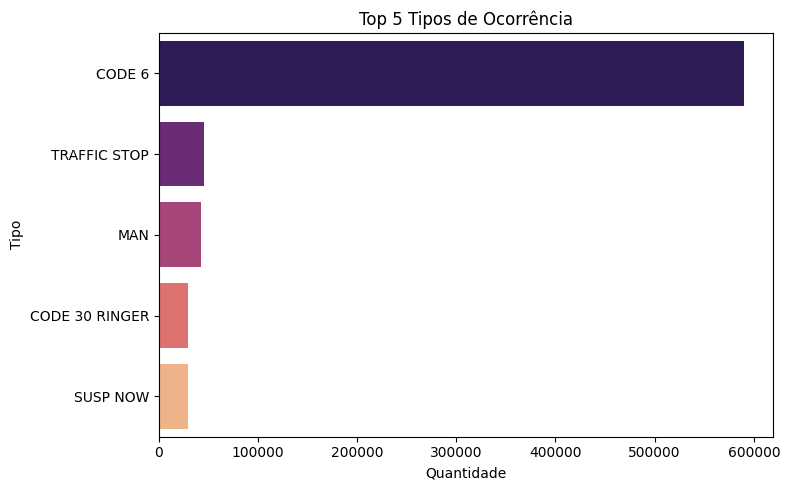

In [69]:
def estatistica_descritiva(df):
    print("Dimensões:", df.shape)
    print("Colunas:", df.columns.tolist())

    top_ocorrencias = df['Call_Type_Text'].value_counts().head(5)
    print("\nTop 5 tipos de ocorrência:")
    print(top_ocorrencias)

    top5_df = top_ocorrencias.reset_index()
    top5_df.columns = ['Call_Type_Text', 'Count']

    plt.figure(figsize=(8, 5))
    sns.barplot(data=top5_df, x='Count', y='Call_Type_Text', palette="magma", hue='Call_Type_Text', dodge=False, legend=False)
    plt.title("Top 5 Tipos de Ocorrência")
    plt.xlabel("Quantidade")
    plt.ylabel("Tipo")
    plt.tight_layout()
    plt.show()

estatistica_descritiva(df_calls_tratado)


## Tendência Mensal com Regressão Linear

O código agrupa as chamadas por períodos de 3 meses, conta quantas ocorreram em cada período, e aplica uma regressão linear simples para identificar a tendência ao longo do tempo. O gráfico mostra os pontos reais das chamadas e a linha da tendência, facilitando visualizar se o número de chamadas está aumentando ou diminuindo a cada trimestre.

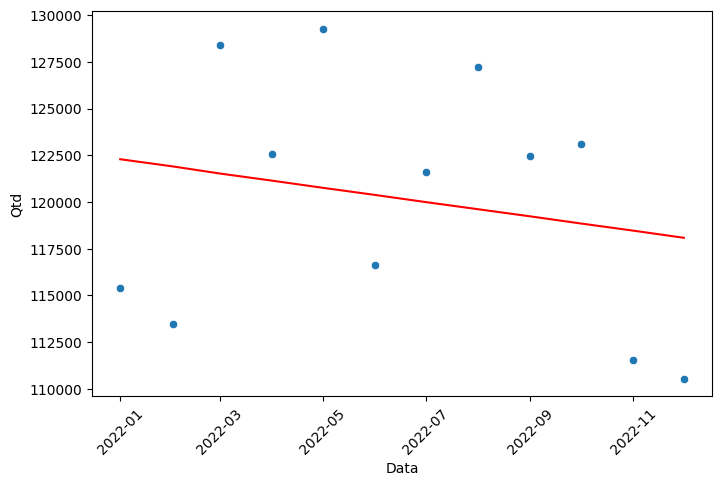

In [70]:
def tendencia_simples(df):
    df = df.dropna(subset=['Dispatch_Date'])
    df['Periodo'] = df['Dispatch_Date'].dt.to_period('3M')

    chamadas = df.groupby('Periodo').size().reset_index(name='Qtd')
    chamadas['Data'] = chamadas['Periodo'].dt.to_timestamp()
    chamadas['Num'] = range(len(chamadas))

    x = chamadas['Num']
    y = chamadas['Qtd']

    a = (len(x)*sum(x*y) - sum(x)*sum(y)) / (len(x)*sum(x*x) - sum(x)**2)
    b = (sum(y) - a*sum(x)) / len(x)

    chamadas['Tendencia'] = a*x + b

    plt.figure(figsize=(8,5))
    sns.scatterplot(x=chamadas['Data'], y=chamadas['Qtd'])
    sns.lineplot(x=chamadas['Data'], y=chamadas['Tendencia'], color='red')
    plt.xticks(rotation=45)
    plt.show()

tendencia_simples(df_calls_tratado)

## Probabilidade dos Tipos de Ocorrência

Probabilidade dos 10 tipos mais comuns de ocorrência:

Call_Type_Text
CODE 6              0.409254
TRAFFIC STOP        0.031488
MAN                 0.029766
CODE 30 RINGER      0.020437
SUSP NOW            0.020365
902 TRAFFIC STOP    0.016009
TRESPASS SUSP       0.014705
SUSP                0.013250
AMB                 0.013173
DOM VIOL            0.012361
Name: proportion, dtype: float64


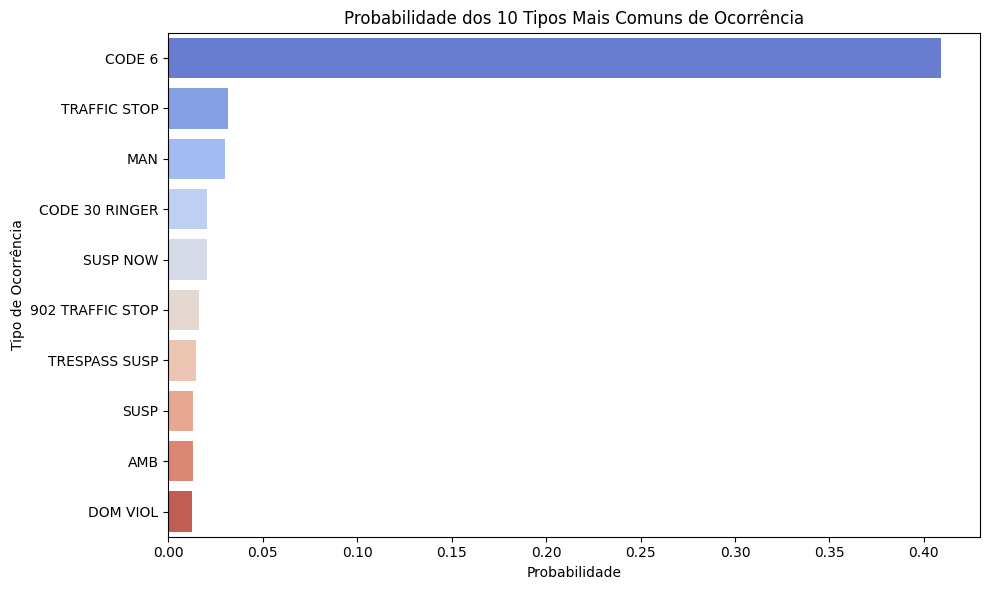

In [72]:
def probabilidade(df):
    prob_tipo = df['Call_Type_Text'].value_counts(normalize=True).head(10)
    print("Probabilidade dos 10 tipos mais comuns de ocorrência:\n")
    print(prob_tipo)

    prob_df = prob_tipo.reset_index()
    prob_df.columns = ['Call_Type_Text', 'Probabilidade']

    plt.figure(figsize=(10, 6))
    sns.barplot(data=prob_df, x='Probabilidade', y='Call_Type_Text', palette='coolwarm', hue='Call_Type_Text',
                dodge=False, legend=False)
    plt.title("Probabilidade dos 10 Tipos Mais Comuns de Ocorrência")
    plt.xlabel("Probabilidade")
    plt.ylabel("Tipo de Ocorrência")
    plt.tight_layout()
    plt.show()

probabilidade(df_calls_tratado)


## Inferência com Intervalo de Confiança

In [74]:
def intervalo_confianca_medio(diarias, confianca=0.95):
    n = len(diarias)
    media = np.mean(diarias)
    desvio = np.std(diarias, ddof=1)
    z_star = norm.ppf(1 - (1 - confianca)/2)
    erro_margem = z_star * (desvio / math.sqrt(n))
    return media, media - erro_margem, media + erro_margem

def inferencia_ic(df):
    regiao1 = 'Southeast'
    regiao2 = 'West LA'

    grupo1 = df[df['Area_Occ'] == regiao1].groupby('Dispatch_Date').size()
    grupo2 = df[df['Area_Occ'] == regiao2].groupby('Dispatch_Date').size()

    media1, li1, ls1 = intervalo_confianca_medio(grupo1)
    media2, li2, ls2 = intervalo_confianca_medio(grupo2)

    print(f"\nIC 95% - {regiao1}: Média: {media1:.2f}, IC: ({li1:.2f}, {ls1:.2f})")
    print(f"IC 95% - {regiao2}: Média: {media2:.2f}, IC: ({li2:.2f}, {ls2:.2f})")

    if ls1 < li2 or ls2 < li1:
        print("\n➡️ Intervalos **não se sobrepõem**: forte evidência de diferença entre as regiões.")
    else:
        print("\n➡️ Intervalos **se sobrepõem**: pode não haver diferença significativa.")

inferencia_ic(df_calls_tratado)



IC 95% - Southeast: Média: 121.11, IC: (119.33, 122.90)
IC 95% - West LA: Média: 118.79, IC: (117.04, 120.54)

➡️ Intervalos **se sobrepõem**: pode não haver diferença significativa.


 ## Probabilidade de o número de chamadas diárias estar num certo intervalo

In [75]:
chamadas_diarias = df_calls_tratado.groupby('Dispatch_Date').size()

media = chamadas_diarias.mean()
desvio = chamadas_diarias.std(ddof=1)

limite_inferior = 3700
limite_superior = 4200

prob_inferior = norm.cdf(limite_inferior, loc=media, scale=desvio)
prob_superior = norm.cdf(limite_superior, loc=media, scale=desvio)

probabilidade = prob_superior - prob_inferior

print(f"Média de chamadas diárias: {media:.2f}")
print(f"Desvio padrão: {desvio:.2f}")
print(f"Probabilidade de chamadas diárias entre {limite_inferior} e {limite_superior}: {probabilidade:.4f}")

Média de chamadas diárias: 3951.31
Desvio padrão: 312.37
Probabilidade de chamadas diárias entre 3700 e 4200: 0.5765


## Aplicação do Teorema de Bayes para Análise Condicional de Chamadas LAPD por Tipo e Região

In [31]:
p_code6 = (df_calls_tratado['Call_Type_Text'] == 'CODE 6').mean()

p_central = (df_calls_tratado['Area_Occ'] == 'Central').mean()

p_central_given_code6 = df_calls_tratado[df_calls_tratado['Call_Type_Text'] == 'CODE 6']['Area_Occ'].value_counts(normalize=True).get('Central', 0)

# Aplicando Bayes: P(CODE6 | Região Central)
p_code6_given_central = (p_central_given_code6 * p_code6) / p_central if p_central > 0 else 0

print(f"P(CODE6) = {p_code6:.4f}")
print(f"P(Região Central) = {p_central:.4f}")
print(f"P(Região Central | CODE6) = {p_central_given_code6:.4f}")
print(f"➡️ P(CODE6 | Região Central) = {p_code6_given_central:.4f}")

P(CODE6) = 0.4093
P(Região Central) = 0.0419
P(Região Central | CODE6) = 0.0149
➡️ P(CODE6 | Região Central) = 0.1454


## Região mais provável para chamadas do tipo 'ASSAULT INVEST'

In [30]:
tipo = "ASSAULT INVEST"
prob_regioes = df_calls_tratado['Area_Occ'].value_counts(normalize=True)
prob_tipo_por_regiao = df_calls_tratado.groupby('Area_Occ')['Call_Type_Text'].apply(lambda x: (x == tipo).mean())
bayes_scores = prob_tipo_por_regiao * prob_regioes
bayes_scores = bayes_scores / bayes_scores.sum()

print(f"Região mais provável para chamadas do tipo '{tipo}': {bayes_scores.idxmax()}")
print(bayes_scores.sort_values(ascending=False))

Região mais provável para chamadas do tipo 'ASSAULT INVEST': Newton
Area_Occ
Northeast      0.100000
Newton         0.100000
Rampart        0.100000
Southeast      0.100000
Foothill       0.100000
Southwest      0.066667
Hollenbeck     0.066667
Olympic        0.066667
Mission        0.066667
Central        0.033333
Van Nuys       0.033333
Outside        0.033333
77th Street    0.033333
Devonshire     0.033333
West Valley    0.033333
Topanga        0.033333
Harbor         0.000000
Hollywood      0.000000
Pacific        0.000000
N Hollywood    0.000000
West LA        0.000000
Wilshire       0.000000
dtype: float64


## Mapa de Calor: Frequência de Chamadas por Tipo e Região


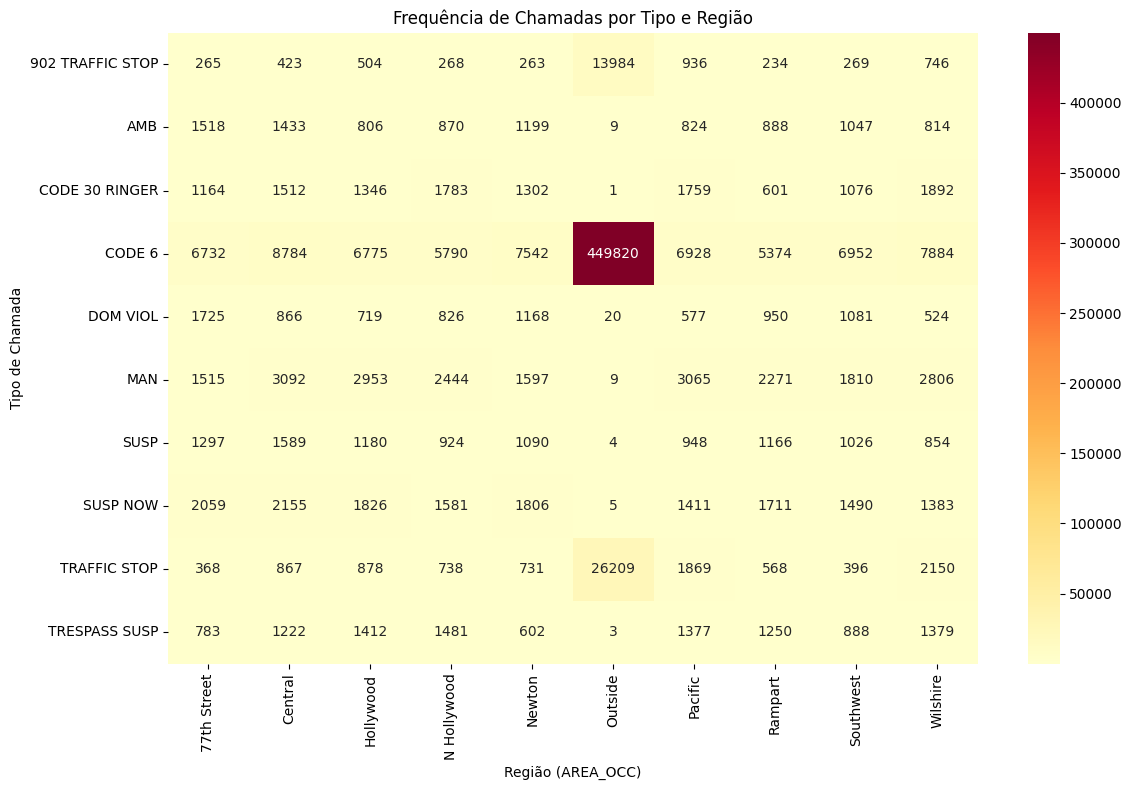

In [29]:
top_tipos = df_calls_tratado['Call_Type_Text'].value_counts().head(10).index
top_regioes = df_calls_tratado['Area_Occ'].value_counts().head(10).index

df_heatmap = df_calls_tratado[df_calls_tratado['Call_Type_Text'].isin(top_tipos) & df_calls_tratado['Area_Occ'].isin(top_regioes)]

tabela = pd.crosstab(df_heatmap['Call_Type_Text'], df_heatmap['Area_Occ'])

plt.figure(figsize=(12,8))
sns.heatmap(tabela, annot=True, fmt='d', cmap='YlOrRd')
plt.title('Frequência de Chamadas por Tipo e Região')
plt.xlabel('Região (AREA_OCC)')
plt.ylabel('Tipo de Chamada')
plt.tight_layout()
plt.show()

## Volume Mensal de Chamadas - LAPD

Este gráfico mostra a quantidade de chamadas recebidas pela LAPD mês a mês ao longo do período analisado. Permite identificar padrões sazonais, picos de demanda e tendências gerais no volume de chamadas, ajudando a entender a dinâmica do atendimento e planejar recursos de forma eficiente.

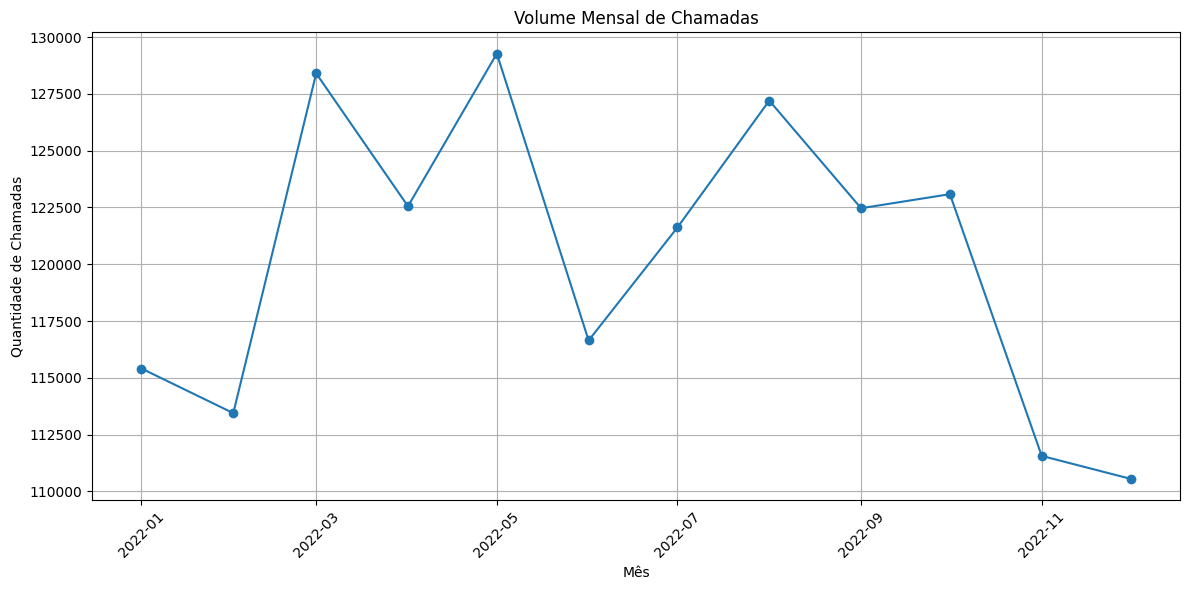

In [77]:
df = df_calls_tratado.copy()
df['AnoMes'] = df['Dispatch_Date'].dt.to_period('M')

chamadas_mes = df.groupby('AnoMes').size().reset_index(name='Qtd_Chamadas')
chamadas_mes['Data'] = chamadas_mes['AnoMes'].dt.to_timestamp()

plt.figure(figsize=(12,6))
plt.plot(chamadas_mes['Data'], chamadas_mes['Qtd_Chamadas'], marker='o')
plt.title('Volume Mensal de Chamadas')
plt.xlabel('Mês')
plt.ylabel('Quantidade de Chamadas')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

## Distribuição das Distâncias Reportadas dos Incidentes

Este gráfico mostra a frequência das distâncias registradas nos incidentes. A distribuição revela como os eventos se espalham geograficamente, ajudando a identificar áreas com maior concentração de ocorrências. A análise das distâncias pode ser útil para planejar recursos e estratégias de resposta mais eficazes.

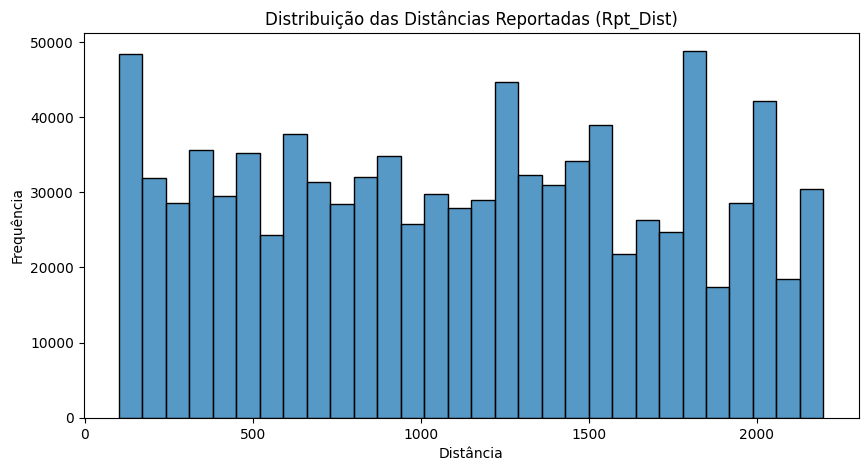

In [79]:
plt.figure(figsize=(10,5))
sns.histplot(df_calls_tratado['Rpt_Dist'].dropna(), bins=30, kde=False)
plt.title('Distribuição das Distâncias Reportadas (Rpt_Dist)')
plt.xlabel('Distância')
plt.ylabel('Frequência')
plt.show()

## Chamados por Área (Area_Occ)

Quantidade de chamados por região/área.
Avalia onde a polícia mais atua.

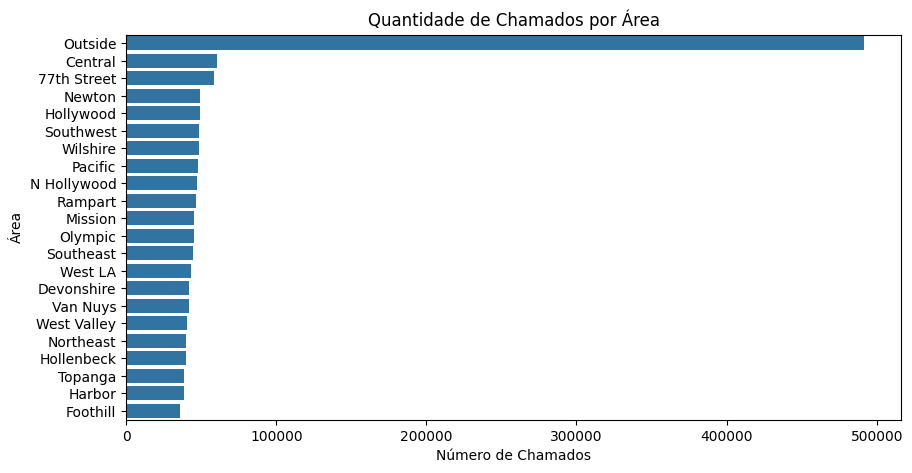

In [81]:
plt.figure(figsize=(10,5))
sns.countplot(data=df_calls_tratado, y='Area_Occ', order=df_calls_tratado['Area_Occ'].value_counts().index)
plt.title('Quantidade de Chamados por Área')
plt.xlabel('Número de Chamados')
plt.ylabel('Área')
plt.show()